In [255]:
# based on https://learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/
from torchvision import models
# dir(models)

In [256]:
AlexNet = models.alexnet(pretrained=True)

In [257]:
print(AlexNet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [258]:
from torchvision import transforms
transform = transforms.Compose([           
 transforms.Resize(256),                   
 transforms.CenterCrop(224),               
 transforms.ToTensor(),                    
 transforms.Normalize(                     
 mean=[0.485, 0.456, 0.406],               
 std=[0.229, 0.224, 0.225]                 
 )])

In [259]:
# from google.colab import files
# import cv2
# import matplotlib.pyplot as plt
# upload = files.upload()




In [260]:
!ls sample_data/ 

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [261]:
from google.colab import drive # correction from https://learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [262]:
!ls # in Colab, can run Linux command after !

drive  sample_data


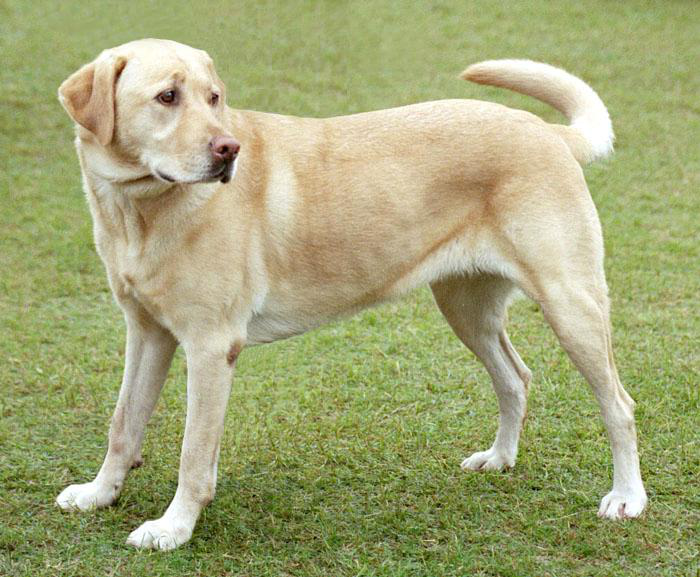

In [263]:
from PIL import Image
img = Image.open('drive/MyDrive/Colab Notebooks/dog.jpg')
img

In [264]:
import torch
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)
AlexNet.eval()
output = AlexNet(batch_t)
print(output.shape)

torch.Size([1, 1000])


In [265]:
with open('drive/MyDrive/Colab Notebooks/imagenet_classes.txt') as f:
  # skip first four lines, the txt file has four additional lines at the top
  for ind in range(4):
    lines = f.readline()   
  classes = [line.strip() for line in f.readlines()]

print (classes)

['0, tench', '1, goldfish', '2, great_white_shark', '3, tiger_shark', '4, hammerhead', '5, electric_ray', '6, stingray', '7, cock', '8, hen', '9, ostrich', '10, brambling', '11, goldfinch', '12, house_finch', '13, junco', '14, indigo_bunting', '15, robin', '16, bulbul', '17, jay', '18, magpie', '19, chickadee', '20, water_ouzel', '21, kite', '22, bald_eagle', '23, vulture', '24, great_grey_owl', '25, European_fire_salamander', '26, common_newt', '27, eft', '28, spotted_salamander', '29, axolotl', '30, bullfrog', '31, tree_frog', '32, tailed_frog', '33, loggerhead', '34, leatherback_turtle', '35, mud_turtle', '36, terrapin', '37, box_turtle', '38, banded_gecko', '39, common_iguana', '40, American_chameleon', '41, whiptail', '42, agama', '43, frilled_lizard', '44, alligator_lizard', '45, Gila_monster', '46, green_lizard', '47, African_chameleon', '48, Komodo_dragon', '49, African_crocodile', '50, American_alligator', '51, triceratops', '52, thunder_snake', '53, ringneck_snake', '54, hogn

In [266]:
_, index = torch.max(output, 1)
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100
print(classes[index[0]], percentage[index[0]].item()) # correction from https://learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/

208, Labrador_retriever 41.58515930175781


In [267]:
_, indices = torch.sort(output, descending=True)
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('208, Labrador_retriever', 41.58515930175781),
 ('207, golden_retriever', 16.591659545898438),
 ('176, Saluki', 16.286876678466797),
 ('172, whippet', 2.853910207748413),
 ('173, Ibizan_hound', 2.3924787044525146)]

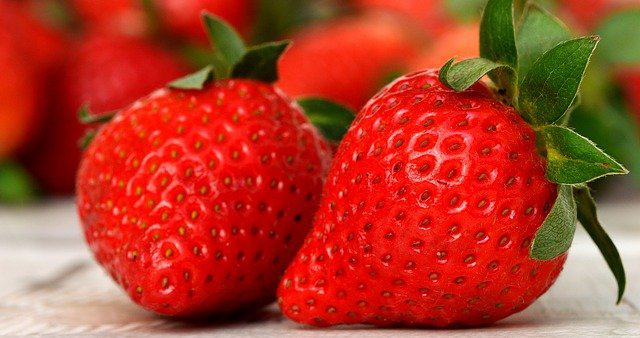

In [268]:
img2 = Image.open('drive/MyDrive/Colab Notebooks/strawberries.jpg')
img2

In [269]:
img_t2 = transform(img2)
batch_t2 = torch.unsqueeze(img_t2, 0)
AlexNet.eval()
output2 = AlexNet(batch_t2)
_, index = torch.max(output2, 1)
_, indices = torch.sort(output2, descending=True)
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('949, strawberry', 1.8086182535625994e-05),
 ('956, custard_apple', 0.00019682879792526364),
 ('954, banana', 1.0827824553416576e-05),
 ('950, orange', 1.7090233086491935e-06),
 ('509, confectionery', 6.61180683891871e-06)]